<h1> Monte Carlo vs. Polynomial Chaos </h1>

This notebook raises a very important question. Why bother using polynomials for estimating moments? What exactly is the advantage? Moreover, are we guaranteed that we will converge to the Monte Carlo solution? The answer is a resounding yes! Infact this is precisely what Dongbin Xiu and George Karniandakis showed in their seminal paper [1]. 

As always we begin with some definitions: Parameter, Polynomial and IndexSet. We will also incorporate the Statistics class. 

In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

For our model problem, let's consider Rosenbrock's function
$$f(x_1, x_2) = (1 - x_1)^2 + 100(x_1 - x_2^2)^2, $$
where we will assume that $x_1$ and $x_2$ are two uncertainties. We will assume that both parameters are Gaussians with $\mu=1$ and $\sigma=2$. Our objective is to compute the mean and variance in the output $f$: $\mu(f)$ and $\sigma(f)$. We start by defining our computational model, and call it fun(x)

In [2]:
def rosenbrock_fun(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

Next, we set the number of evaluation points in each direction. Lets opt for 4 points in the first direction $(x_1)$ and 7 points in the second direction $(x_2)$. Using a tensor grid, this results in 28 points.

In [3]:
degree = 6
points_used = degree + 1
mu = 1
sigma = 2
variance = sigma**2
x1 = Parameter(param_type="Gaussian", shape_parameter_A=mu, shape_parameter_B=variance, points=points_used)
x2 = Parameter(param_type="Gaussian", shape_parameter_A=mu, shape_parameter_B=variance, points=points_used)
parameters = [x1, x2]

Now, just to be sure we are getting the right distributions, we can plot the Gaussian

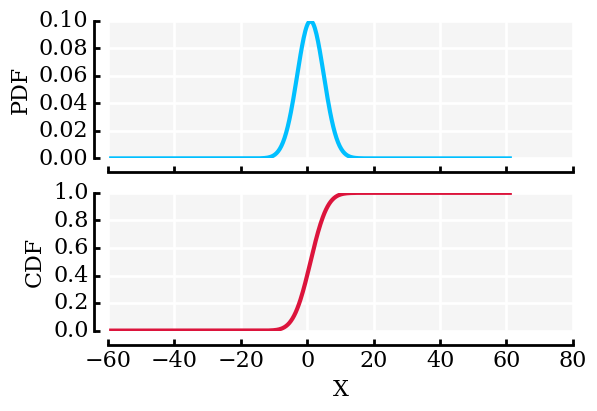

In [4]:
x1.plot()

Excellent! Now let us create a tensor grid!

In [5]:
basis = IndexSet('Tensor grid',[degree, degree])
uqProblem = Polyint(parameters, basis)
pts, wts = uqProblem.getPointsAndWeights()

And lets plot the points

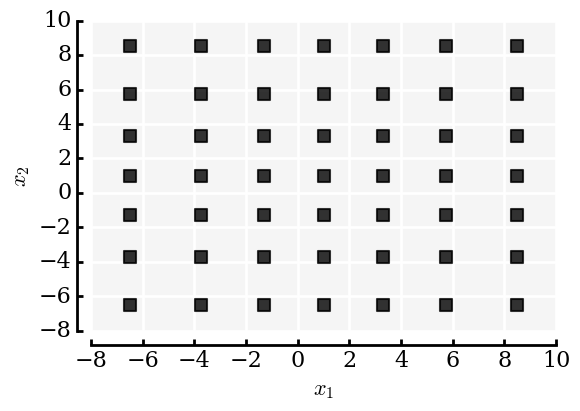

In [6]:
plotting.scatterplot(pts[:,0], pts[:,1], 
            '$x_1$', '$x_2$', marker_type='s', color_choice='black', filename='out.eps')

Computing the coefficients requires integrating over the parameter ([$x_1$, $x_2$]) space using the above tensor product quadrature rule. 

In [7]:
coefficients, indices, pts = uqProblem.getPolynomialCoefficients(rosenbrock_fun)

Now we can compute the statistics by simply passing on the coefficients and the indices (corresponding to the tensor grid) to the Statistics class.

In [8]:
stats = Statistics(coefficients, basis)
print stats.mean
print stats.variance

6804.0
476659232.0


Now we compare this result with brute-force Monte Carlo.

In [9]:
large_number = 1000000
s = sigma * np.random.randn(large_number,2) + mu
f = np.zeros((large_number,1))
for i in range(0, large_number):
    f[i,0] = rosenbrock_fun([s[i,0], s[i,1]])

In [10]:
print 'MONTE CARLO MEAN & VARIANCE:'
print str(np.mean(f))+'\t'+str(np.var(f))

MONTE CARLO MEAN & VARIANCE:
6839.33472163	488404929.651


They seem pretty close! yay! 

<h2> References </h2>

[1] Xiu, Dongbin, and George Em Karniadakis. "The Wiener--Askey polynomial chaos for stochastic differential equations." SIAM journal on scientific computing 24.2 (2002): 619-644.